# Process Data

In [1]:
# import pandas as pd

# def process(df):
#     # This is where you can do all your processing
#     df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
#     df['Helpfulness'] = df['Helpfulness'].fillna(0)

#     return df

# # Load the dataset
# trainingSet = pd.read_csv("/Users/mzhen/Downloads/midterm-melzhen/data/train.csv")

# # Process the DataFrame
# train_processed = process(trainingSet)

# # Load test set
# submissionSet = pd.read_csv("/Users/mzhen/Downloads/midterm-melzhen/data/test.csv")

# # Merge on Id so that the test set can have feature columns as well
# testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
# testX = testX.drop(columns=['Score_x'])
# testX = testX.rename(columns={'Score_y': 'Score'})

# # The training set is where the score is not null
# trainX =  train_processed[train_processed['Score'].notnull()]

# testX.to_csv("/Users/mzhen/Downloads/midterm-melzhen/data/X_test.csv", index=False)
# trainX.to_csv("/Users/mzhen/Downloads/midterm-melzhen/data/X_train.csv", index=False)

# Load and split data into Training and Testing Sets

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

X_train = pd.read_csv("/Users/mzhen/Downloads/midterm-melzhen/data/X_train.csv")
X_submission = pd.read_csv("/Users/mzhen/Downloads/midterm-melzhen/data/X_test.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
            X_train.drop(['Score'], axis=1),
            X_train['Score'],
            test_size=1/4.0,
            random_state=2
        )

In [46]:
X_train_processed = X_train.drop(columns=['Id', 'HelpfulnessNumerator', 'Time', 'HelpfulnessDenominator'])
X_test_processed = X_test.drop(columns=['Id', 'HelpfulnessNumerator', 'Time', 'HelpfulnessDenominator'])
X_submission_processed = X_submission.drop(columns=['Id', 'Score', 'Time', 'HelpfulnessNumerator', 'HelpfulnessDenominator'])

In [47]:
X_train_processed['Score'] = Y_train
X_train_processed = X_train_processed.sort_values(['ProductId', 'Helpfulness'], ascending=False)
# handle missing values by forward filling
X_train_processed= X_train_processed.fillna(method='ffill')
Y_train = X_train_processed['Score']
X_train_processed = X_train_processed.drop(columns = ['Score'])

In [48]:
X_test_processed['Score'] = Y_test
X_test_processed = X_test_processed.sort_values(['ProductId', 'Helpfulness'], ascending=False)
# handle missing values by forward filling
X_test_processed= X_test_processed.fillna(method='ffill')
Y_test = X_test_processed['Score']
X_test_processed = X_test_processed.drop(columns = ['Score'])

In [49]:
# handle missing values by forward filling
X_submission_processed= X_submission_processed.fillna(method='ffill')

In [50]:
X_train_processed = X_train_processed.where(pd.notnull(X_train_processed), 'None')
X_test_processed = X_test_processed.where(pd.notnull(X_test_processed), 'None')
X_submission_processed = X_submission_processed.where(pd.notnull(X_submission_processed), 'None')

In [51]:
X_train_processed.head()

,ProductId,UserId,Summary,Text,Helpfulness
1397530,B00LT1JHLW,A3DE438TF1A958,prayers have been answered because batman 60s ...,Could this be a true or I'm i dreaming batman ...,0.300000
1397526,B00LT1JHLW,APO10VQE3MAKE,Finally!,Well it is finally coming to fruition! Batman...,0.222222
1397527,B00LT1JHLW,A3UHLJGZ2E84A5,$1.57 per episode. $3.14 per hour.,"Seems expensive, but it is for 120 episodes. T...",0.190476
1397528,B00LT1JHLW,A22OB0DIJ5FO0G,"Worth the wait, but worth the asking price, too?","Looking very much forward to this release, but...",0.166667
1397531,B00LT1JHLW,A2RWCXDMANY0LW,can't Wait!,I've been a fan of the series since I was a yo...,0.000000


# Pre-Process Text and Summary columns

In [52]:
import nltk
import string

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# remove stopwords
def remove_stopWords(s):
    s = ' '.join(word for word in s if word not in stopwords_list)
    return s

def Preprocess(df):
  # remove non alphanumeric
  df = df.astype(str).str.replace('[^a-zA-Z0-9 ]', '')
  # lowercase
  df = df.astype(str).apply(lambda x : str.lower(x))
  # remove punctuation
  df = df.astype(str).apply( lambda x: remove_punctuation(x))
  # split into list
  df = df.astype(str).str.split(' ')
  # remove stopwords
  df = df.apply(lambda x: remove_stopWords(x))
  
  return df

[nltk_data] Downloading package stopwords to /Users/mzhen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mzhen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
X_train_processed['Text'] = Preprocess(X_train_processed['Text'])
X_test_processed['Text'] = Preprocess(X_test_processed['Text'])
X_submission_processed['Text'] = Preprocess(X_submission_processed['Text'])

X_train_processed['Summary'] = Preprocess(X_train_processed['Summary'])
X_test_processed['Summary'] = Preprocess(X_test_processed['Summary'])
X_submission_processed['Summary'] = Preprocess(X_submission_processed['Summary'])

/var/folders/bz/453p46hx0blfvh51flvb0psr0000gn/T/ipykernel_6247/1835982481.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df.astype(str).str.replace('[^a-zA-Z0-9 ]', '')


In [54]:
X_train_processed["Number of Words"] = X_train_processed['Text'].astype(str).apply(lambda x: len(x.split()))
X_test_processed["Number of Words"] = X_train_processed['Text'].astype(str).apply(lambda x: len(x.split()))
X_submission_processed["Number of Words"] = X_train_processed['Text'].astype(str).apply(lambda x: len(x.split()))

# Combine Review attributes

In [56]:
X_train_processed['Combined_Review'] = X_train_processed["Number of Words"].astype(str).str.cat(X_train_processed['ProductId'].str.cat(X_train_processed['Text'].str.cat(X_train_processed['Summary'].str.cat(X_train_processed['UserId'], sep = ' '), sep = ' '), sep = ' '), sep = ' ')
X_test_processed['Combined_Review'] = X_test_processed["Number of Words"].astype(str).str.cat(X_test_processed['ProductId'].str.cat(X_test_processed['Text'].str.cat(X_test_processed['Summary'].str.cat(X_test_processed['UserId'], sep = ' '), sep = ' '), sep = ' '), sep = ' ')
X_submission_processed['Combined_Review'] = X_submission_processed["Number of Words"].astype(str).str.cat(X_submission_processed['ProductId'].str.cat(X_submission_processed['Text'].str.cat(X_submission_processed['Summary'].str.cat(X_submission_processed['UserId'], sep = ' '), sep = ' '), sep = ' '), sep = ' ')

In [57]:
X_train_processed.drop(columns = ['ProductId', 'Text', 'Summary', 'UserId'])
X_test_processed.drop(columns = ['ProductId', 'Text', 'Summary', 'UserId'])
X_submission_processed.drop(columns = ['ProductId', 'Text', 'Summary', 'UserId'])

,Helpfulness,Number of Words,Combined_Review
0,0.000000,27.0,27.0 0005019281 favorite movie mine long time ...
1,0.000000,11.0,11.0 0005019281 even though dont care henry wi...
2,0.000000,NaN,nan 0005019281 anorher good movie holiday watc...
3,0.714286,15.0,15.0 0005019281 wife grew new hampshire versio...
4,0.000000,NaN,nan 0005019281 first didnt like movie think 20...
...,...,...,...
299995,0.000000,NaN,nan B00LH9ROKM seriously one take scott derric...
299996,0.284091,93.0,93.0 B00LT1JHLW lets clear 5 stars series pro...
299997,0.300000,NaN,nan B00LT1JHLW would also like see original 20...
299998,0.714286,14.0,14.0 B00LT1JHLW finally released dvd bluray no...


# Use CountVectorizer and finding the best max_df value 

Tested using Multinomial Naive Bayes Classifer since it runs the fastest.

In [13]:
# from sklearn.metrics import mean_squared_error
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer

# root_mse = []
# max_df_val = 0.9

# for i in range(10):
#     vectorizer = CountVectorizer(stop_words = 'english', max_df=max_df_val, strip_accents = 'ascii', lowercase=True)

#     X_train_mat = vectorizer.fit_transform(X_train_processed.Combined_Review)
#     X_test_mat = vectorizer.transform(X_test_processed.Combined_Review)

#     MNB = MultinomialNB()
#     mnbModel = MNB.fit(X_train_mat, Y_train)

#     y_pred = mnbModel.predict(X_test_mat)

#     root_mse.append(mean_squared_error(Y_test, y_pred, squared=False))
#     print("RMSE on testing set with max_df=", max_df_val, " is ", mean_squared_error(Y_test, y_pred, squared=False))
    
#     max_df_val += 0.01

# Use TF-IDF Vectorizer 
I ended up getting a higher RMSE than when using CountVectorizer

In [14]:
# from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf


# vectorizer = tf_idf(norm = None, stop_words = 'english', max_df=0.95, strip_accents = 'ascii', lowercase=True)
# X_train_mat = vectorizer.fit_transform(X_train_processed.Combined_Review)
# X_test_mat = vectorizer.transform(X_test_processed.Combined_Review)

# from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
# from sklearn.naive_bayes import MultinomialNB

# MNB = MultinomialNB()

# mnbModel = MNB.fit(X_train_mat, Y_train)

# Y_pred = mnbModel.predict(X_test_mat)

# # Evaluate your model on the testing set
# print("Accuracy on testing set = ", accuracy_score(Y_test, Y_pred))
# print("RMSE on testing set = ", mean_squared_error(Y_test, Y_pred, squared=False))

# Use CountVectorizer with Optimal parameters

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english', max_df=0.92, strip_accents = 'ascii', lowercase=True)

In [59]:
X_train_processed = X_train_processed['Helpfulness'].astype(str).str.cat(X_train_processed['Combined_Review'], sep = ' ')
X_test_processed = X_test_processed['Helpfulness'].astype(str).str.cat(X_test_processed['Combined_Review'], sep = ' ')
X_submission_processed = X_submission_processed['Helpfulness'].astype(str).str.cat(X_submission_processed['Combined_Review'], sep = ' ')

In [60]:
X_train_mat = vectorizer.fit_transform(X_train_processed)
X_test_mat = vectorizer.transform(X_test_processed)

# Using Multinomial Naive Bayes Classifier

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

mnbModel = MNB.fit(X_train_mat, Y_train)

Y_pred = mnbModel.predict(X_test_mat)

# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_pred))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_pred, squared=False))

Accuracy on testing set =  0.6113903326998374
RMSE on testing set =  1.0342753860328338


# Using Logistic Regression Classifier

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error


LR = LogisticRegression()

lrModel = LR.fit(X_train_mat, Y_train)

Y_pred = lrModel.predict(X_test_mat)

# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_pred))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_pred, squared=False))

/Users/mzhen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on testing set =  0.6475253589174089
RMSE on testing set =  0.9203054285591599


In [19]:
# LR2 = LogisticRegression(C=1000, tol=0.01, solver='saga', random_state=1)

# lrModel2 = LR2.fit(X_train_mat, Y_train)

# Y_pred = lrModel2.predict(X_test_mat)

# # Evaluate your model on the testing set
# print("Accuracy on testing set = ", accuracy_score(Y_test, Y_pred))
# print("RMSE on testing set = ", mean_squared_error(Y_test, Y_pred, squared=False))

# Plot Confusion Matrix

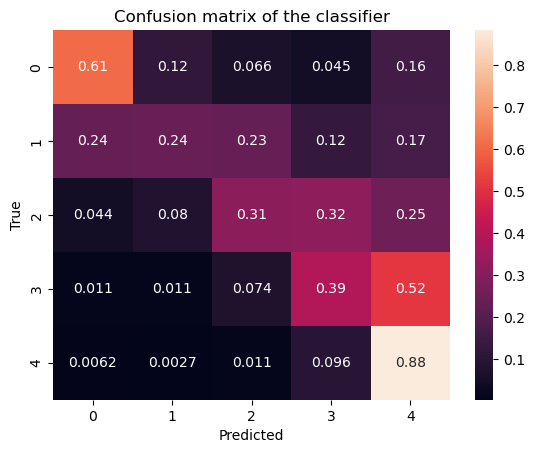

In [63]:
# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Predict Scores and save to csv file

In [64]:
X_submission_mat = vectorizer.transform(X_submission_processed)
X_submission['Score'] = lrModel.predict(X_submission_mat)

In [65]:
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission18.csv", index=False)